<a href="https://colab.research.google.com/drive/1LZ8HY1Y5HH0OSqmpHUkSzRE7HTzeMxQo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [2]:
import requests


url_dict = {
    'sgd_data.csv': 'https://drive.usercontent.google.com/download?id=14UPDlsLd9sn0aVOCjslCgyB3AtQoYvnZ&export=download&authuser=0&confirm=t&uuid=ae3b4a91-9c34-42b0-8c90-d368456462d3&at=APZUnTWYXEnTwNQ08i_q89zDsaJv:1704950346746'
}


def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [3]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [4]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    prod = np.dot(X, w)
    return np.mean((Y - prod) **2)

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to w.
    '''

    return -2*x*(y - np.dot(x, w))

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    training_err = []
    w = np.copy(w_start)
    for _ in range(N_epochs):
      err = loss(X, Y, w)
      training_err.append(err)
      permutation = np.random.permutation(len(Y))
      X_shuffled = X[permutation]
      Y_shuffled = Y[permutation]
      for i in range(len(X)):
        x = X_shuffled[i]
        y = Y_shuffled[i]
        grad = gradient(x, y, w)
        w -= eta*grad
    return w, training_err



Next, we need to load the dataset. In doing so, the following function may be helpful:

In [5]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: GeneratorExitiven as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [6]:
download_file('sgd_data.csv')

Start downloading...
Complete


In [13]:
data = load_data('sgd_data.csv')
x = data[:, :4]
y = data[:, -1]
x = np.hstack((np.ones((x.shape[0], 1)), x))
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
weights, training_err = SGD(x, y, w_start, np.exp(-15), 1000)
print(weights)

[ -0.22789042  -5.97854588   3.98838452 -11.8570128    8.91129317]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

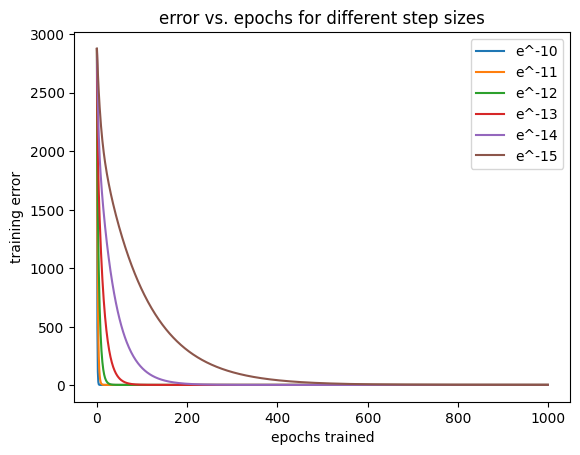

In [14]:
rates = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
epochs = np.arange(1000)
rate_labels = []
for n in rates:
  weights, training_err = SGD(x, y, w_start, n, 1000)
  plt.plot(training_err)
  rate_labels.append(f"e^{int(np.log(n) / np.log(np.exp(1)))}")

plt.legend(rate_labels)
plt.xlabel('epochs trained')
plt.ylabel('training error')
plt.title('error vs. epochs for different step sizes')

plt.show()

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [9]:
prod = np.dot(x.T, x)
prod_inv = np.linalg.inv(prod)
weights_ls = np.dot(prod_inv, np.dot(x.T, y))
print(weights_ls)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
